### 전국 및 세종시 가구 원 비율

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import numpy as np
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [9]:
data=pd.read_csv('./Data/가구원수별_가구_일반가구___읍면동_2015___시군구_2016__20210320160717.csv',encoding='cp949',header=1)
jeonguk=data[data['행정구역별(읍면동)']=='전국']
list_index_oul=list(jeonguk.T.index[2:])#1인가구~~7인이상
value_pop_oul=list(jeonguk.T.iloc[2:][0])#그들의 값

In [10]:
sejong=data[data['행정구역별(읍면동)']=='세종특별자치시']
sejong=sejong.T
list_index_jong=list(sejong.index[2:])
value_pop_jong=list(sejong.iloc[2:][11])

#### 2019년 전국 가구원 수 비율

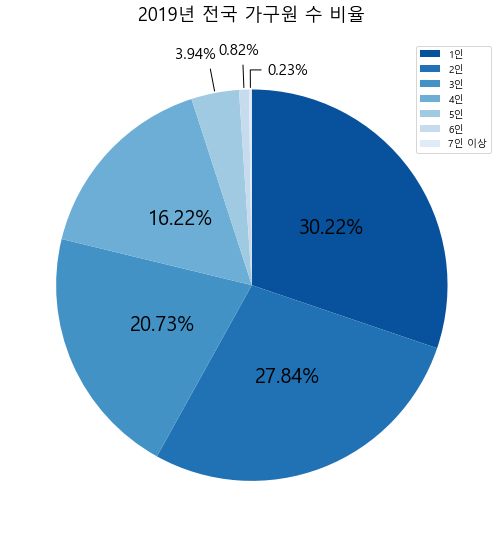

In [13]:
colors = sns.color_palette('Blues_r',len(value_pop_oul))
labels = list_index_oul 
frequency = value_pop_oul
fig = plt.figure(figsize=(9,9)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
pie = ax.pie(frequency, 
        startangle=90,
       counterclock=False, 
       colors = colors, 
        explode = [0,0,0,0,0,0,0])
total = np.sum(frequency) 
threshold = 5 
sum_pct = 0 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0)
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    if frequency[i]/total*100 < threshold and i < len(labels) - 1:
        ang = (ang1+ang2)/2 
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) 
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.1, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    elif frequency[i]/total*100 < threshold and i >= len(labels) - 1:
        ang = (ang1+ang2)/2
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) 
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.3, 1.2*y-0.1),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
plt.title('2019년 전국 가구원 수 비율', fontsize=18,pad=20)
plt.legend(labels,loc='upper right') 
plt.savefig('2019년 전국 가구원 수 비율'+'.png')
plt.show()

#### 2019년 세종 가구원 수 비율

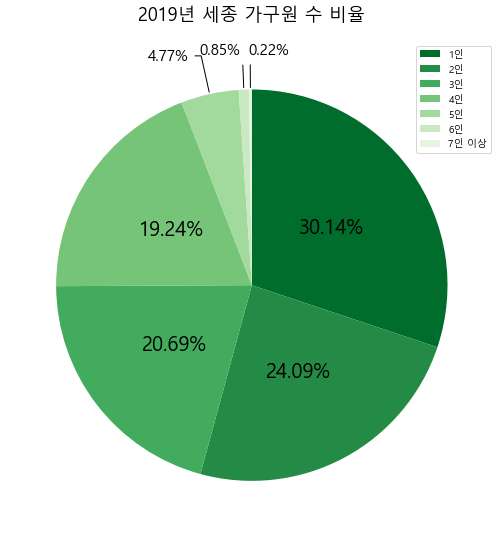

In [14]:
colors = sns.color_palette('Greens_r',len(list_index_jong))
labels = list_index_jong 
frequency = value_pop_jong
fig = plt.figure(figsize=(9,9)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
pie = ax.pie(frequency, 
        startangle=90, 
       counterclock=False, 
       colors = colors,
        explode = [0,0,0,0,0,0,0])
total = np.sum(frequency) 
threshold = 5 
sum_pct = 0 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) 
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    if frequency[i]/total*100 < threshold and i < len(labels) - 1:
        ang = (ang1+ang2)/2 
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) 
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    elif frequency[i]/total*100 < threshold and i >= len(labels) - 1:
        ang = (ang1+ang2)/2 
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.2, 1.2*y),
                    horizontalalignment=horizontalalignment, **config, fontsize=15)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
plt.title('2019년 세종 가구원 수 비율', fontsize=18,pad=20)
plt.legend(labels,loc='upper right') 
plt.savefig('2019년 세종 가구원 수 비율'+'.png')
plt.show()